In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import locale as lc

#### Data Import

In [8]:
df_coal = pd.read_csv('treated_data/Energies/coal_treated.csv', sep = ';').drop('Unnamed: 0', axis = 1)
df_wind = pd.read_csv('treated_data/Energies/wind_treated.csv', sep = ';').drop('Unnamed: 0', axis = 1)
df_solar = pd.read_csv('treated_data/Energies/solar_treated.csv', sep = ';').drop('Unnamed: 0', axis = 1)
df_gas = pd.read_csv('treated_data/Energies/gas_treated.csv', sep = ';').drop('Unnamed: 0', axis = 1)

In [ ]:
df_coal_ = pd.read_csv('treated_data/Production/coal_treated.csv', sep = ';').drop('Unnamed: 0', axis = 1)
df_wind_ = pd.read_csv('treated_data/Production/wind_treated.csv', sep = ';').drop('Unnamed: 0', axis = 1)
df_solar_ = pd.read_csv('treated_data/Production/solar_treated.csv', sep = ';').drop('Unnamed: 0', axis = 1)
df_gas_ = pd.read_csv('treated_data/Production/gas_treated.csv', sep = ';').drop('Unnamed: 0', axis = 1)

In [ ]:
df_coal['Capacity (MW)'] = df_coal['Capacity (KW)'].apply(lambda x: x/1000)
df_wind['Capacity (MW)'] = df_wind['Capacity (KW)'].apply(lambda x: x/1000)
df_solar['Capacity (MW)'] = df_solar['Capacity (KW)'].apply(lambda x: x/1000)
df_gas['Capacity (MW)'] = df_gas['Capacity (KW)'].apply(lambda x: x/1000)

# Analyses par type d'energie

In [63]:
def plot_synthesis(df,energy):
    
    df_interest = df.where(df['Year']>2003).dropna().drop(['Unit','Month','Technology'],axis=1)    
    
    fig, ax1 = plt.subplots()

    year = df_interest['Year']
    production = df_interest['Production_GWh']
    capacity = df_interest['Capacity_MW']
    cap_fac = df_interest['Capacity_Factor_%']

    ax1.set_xlabel('Year')
    ax1.set_ylabel('GWh')
    ax1.plot(year,production , color='orange', label = 'Production (GWh)')
    ax1.legend(loc='upper left')

    
    ax2 = ax1.twinx()
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('MW')  # we already handled the x-label with ax1
    ax2.plot(year, capacity, color='g', label = 'Capacity (MW)')
    ax2.legend(loc='upper right')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(energy+ 'Production and capacity')
    plt.show()
    
    fig, ax3 = plt.subplots()

    ax3.set_ylabel('%')  # we already handled the x-label with ax1
    ax3.plot(year, cap_fac, color='g', label = 'Capacity Factor (%)')
    ax3.legend(loc='upper right')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(energy+'Capacity Factor')
    plt.show()

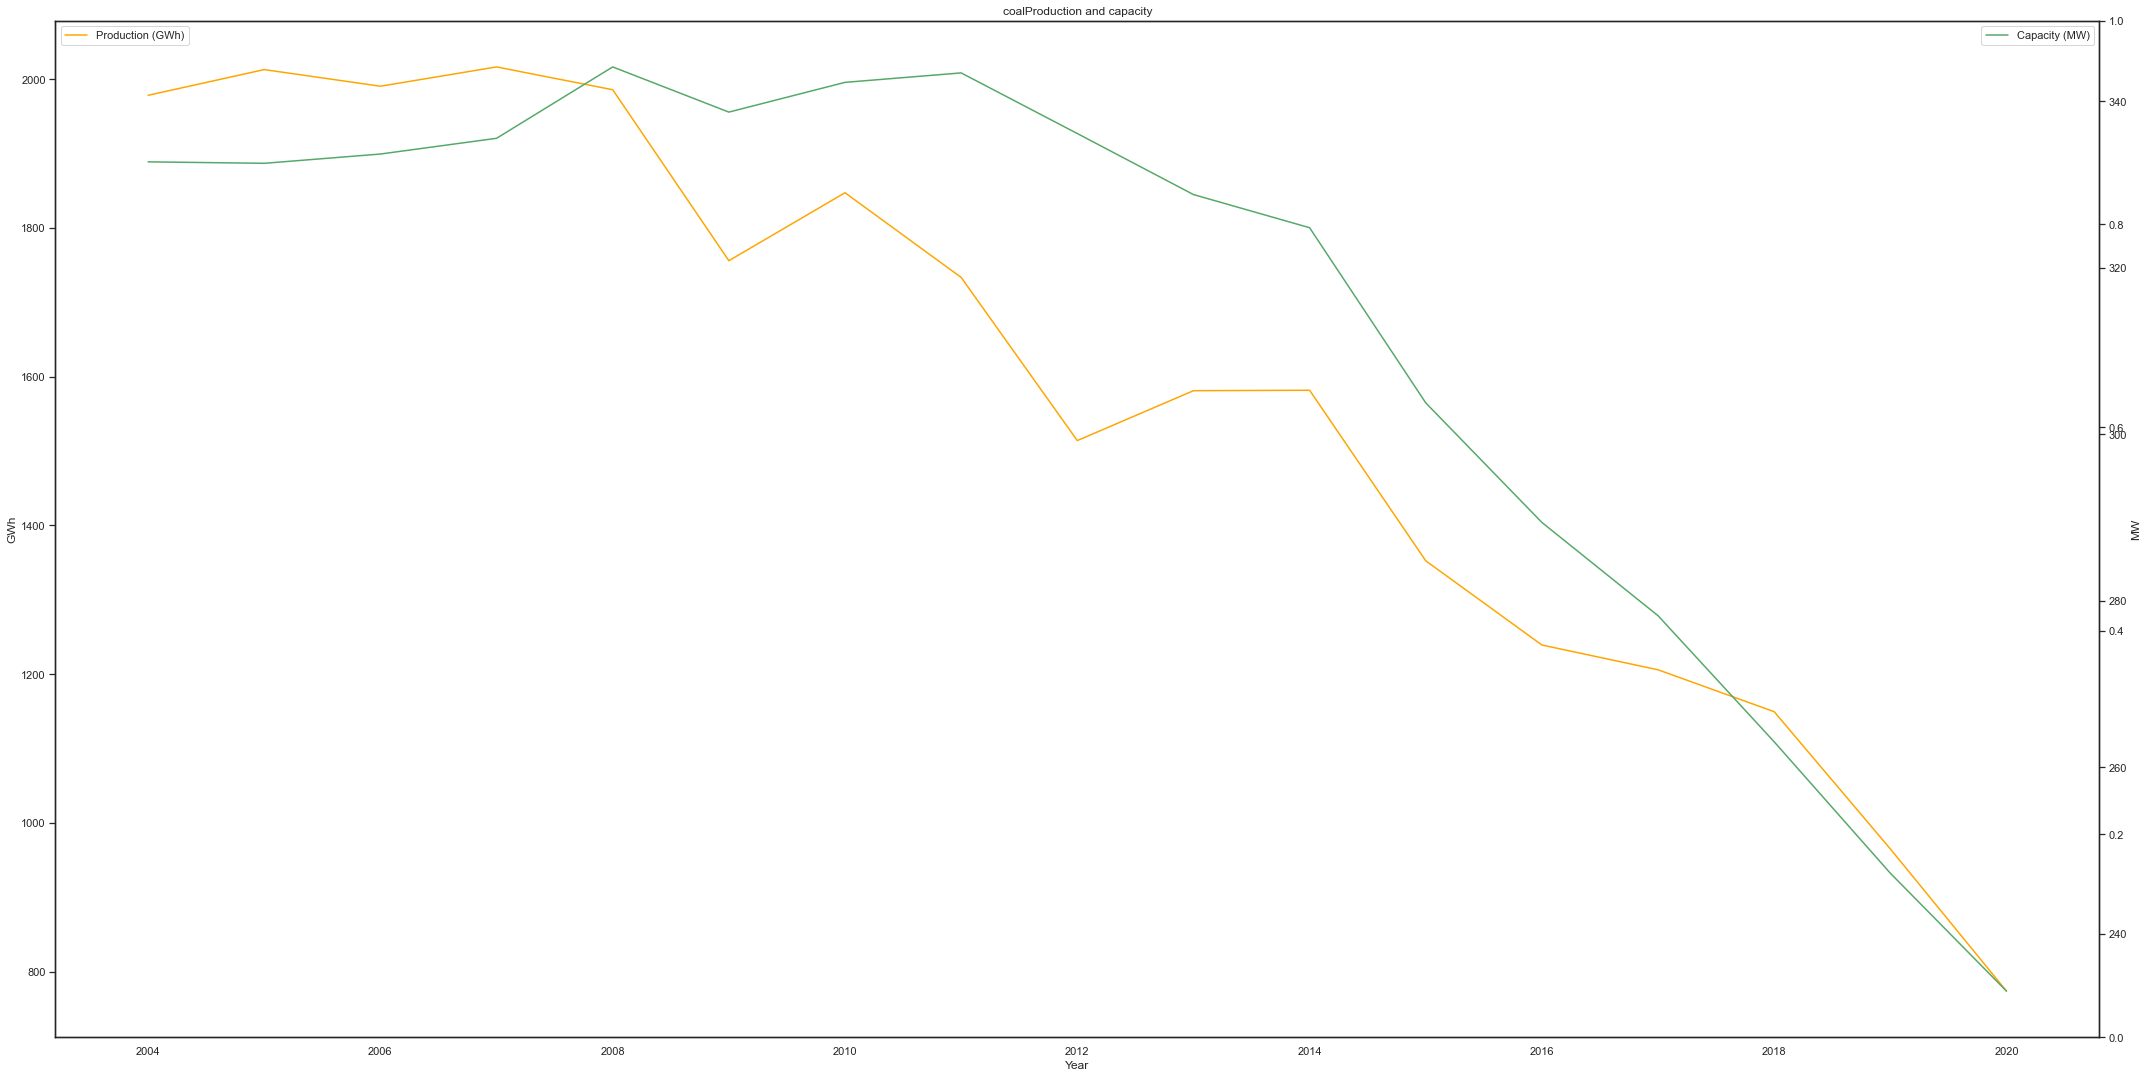

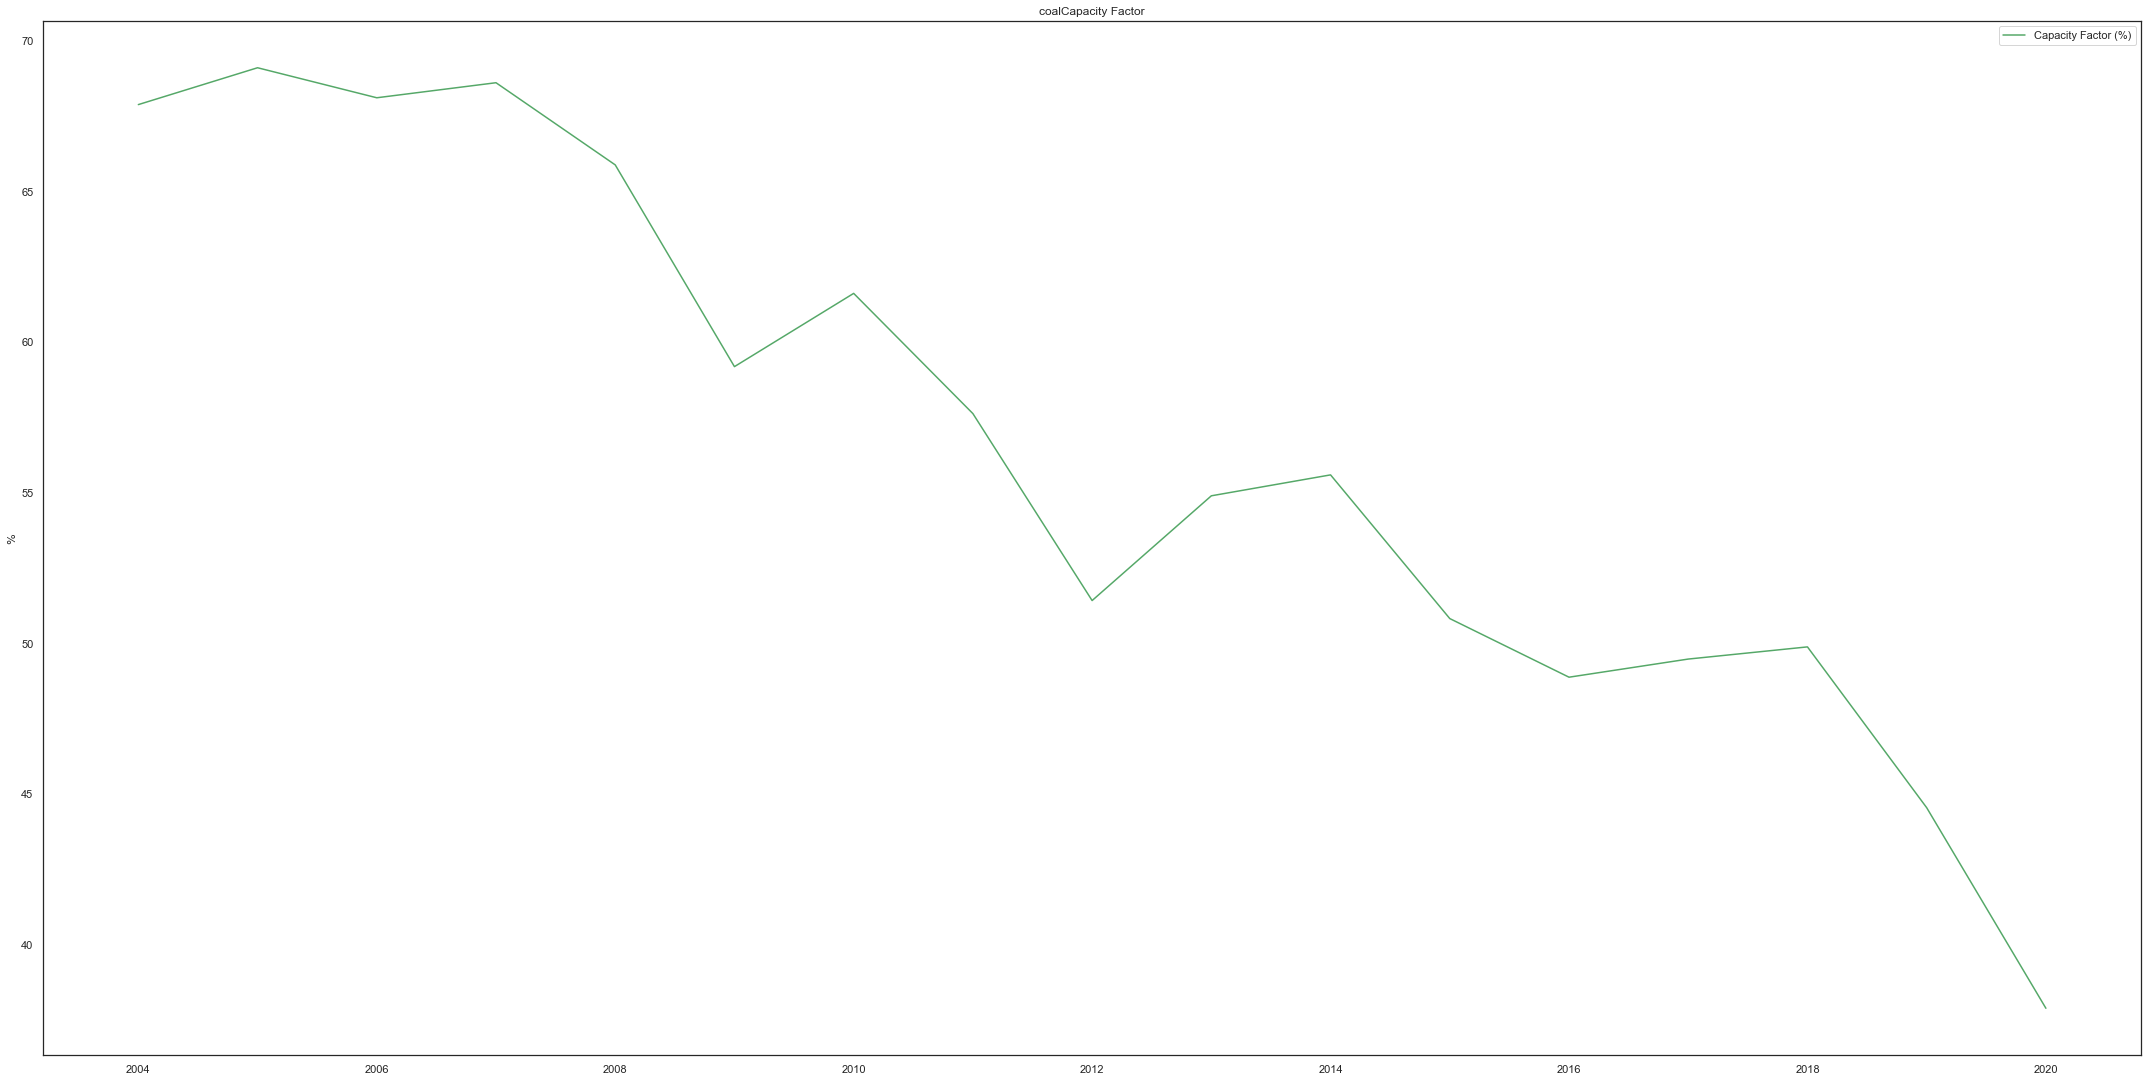

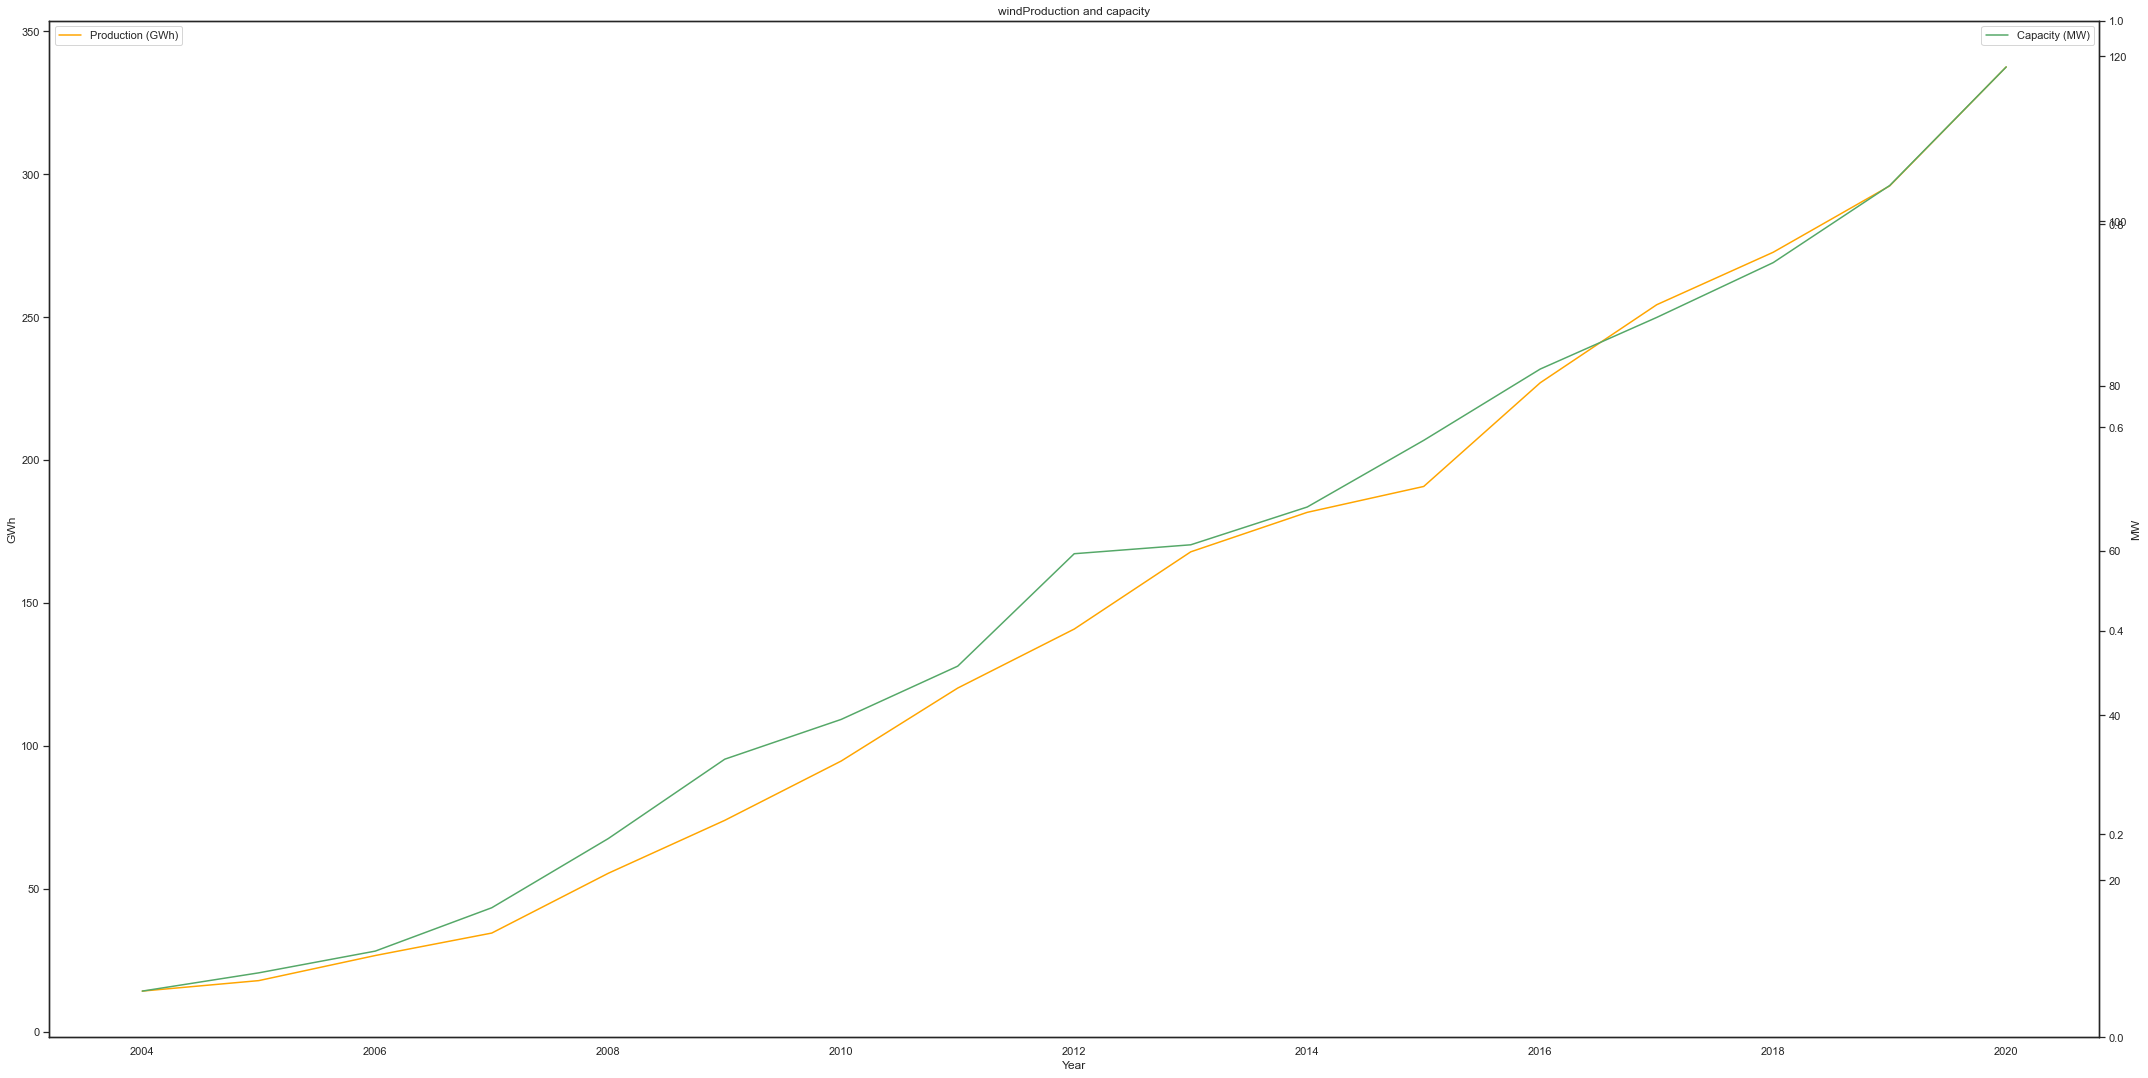

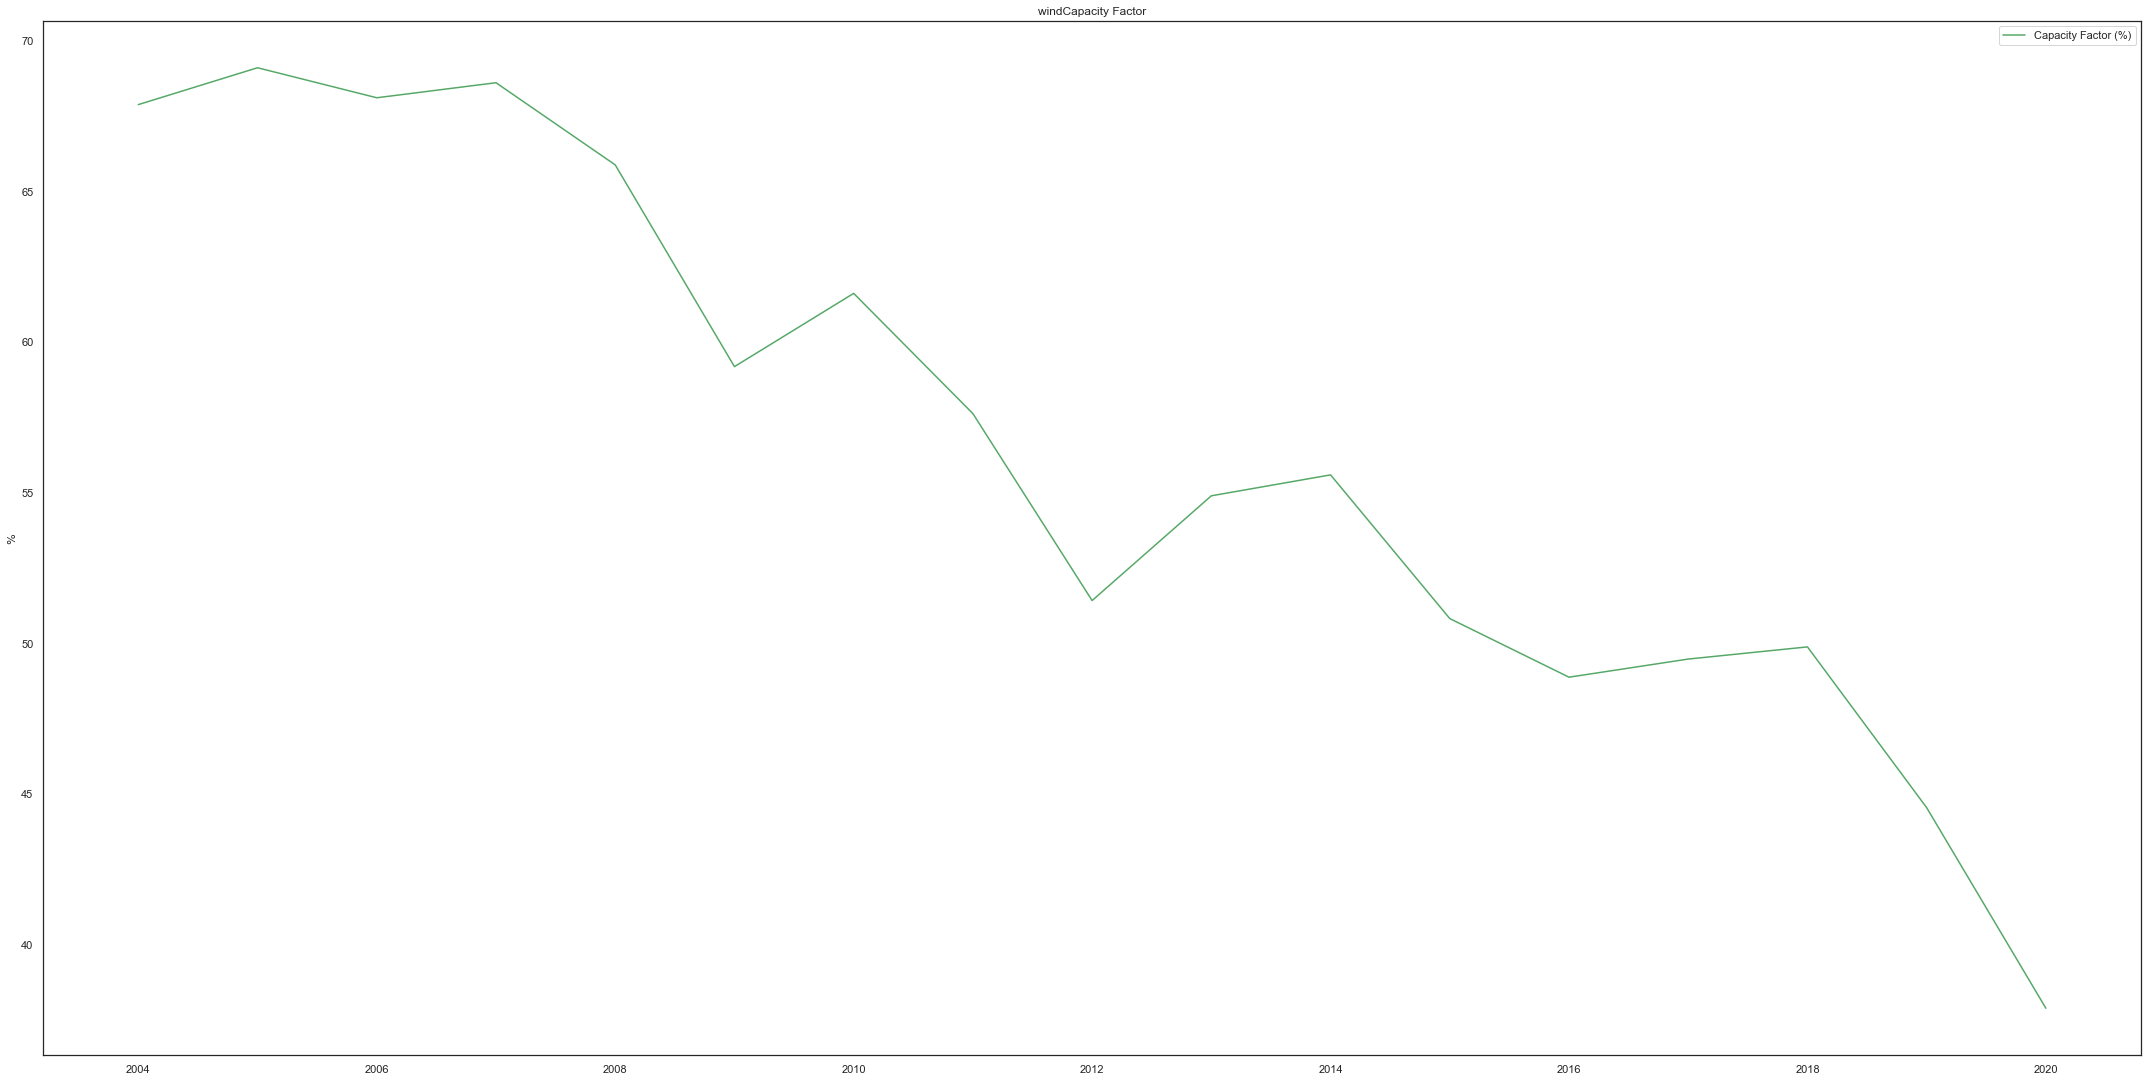

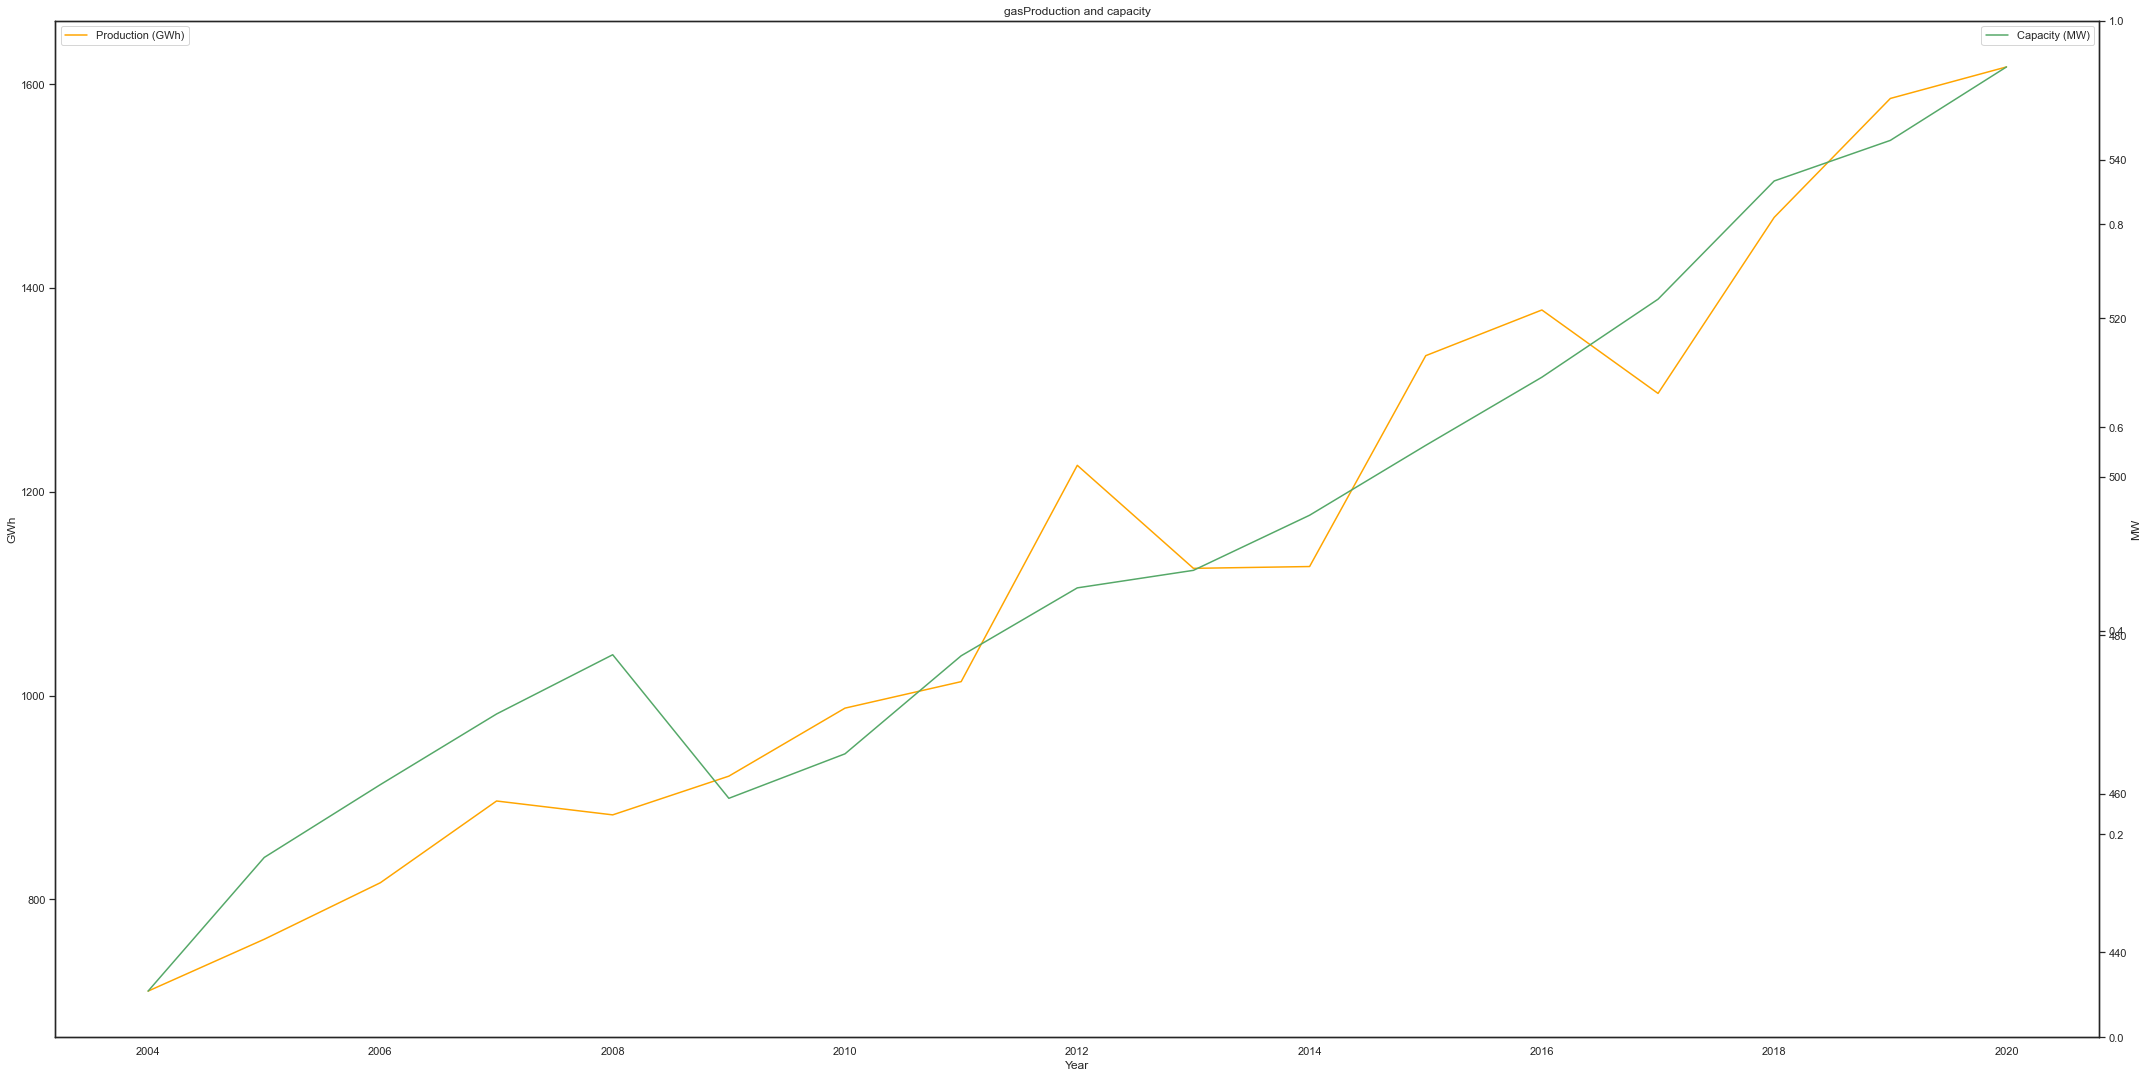

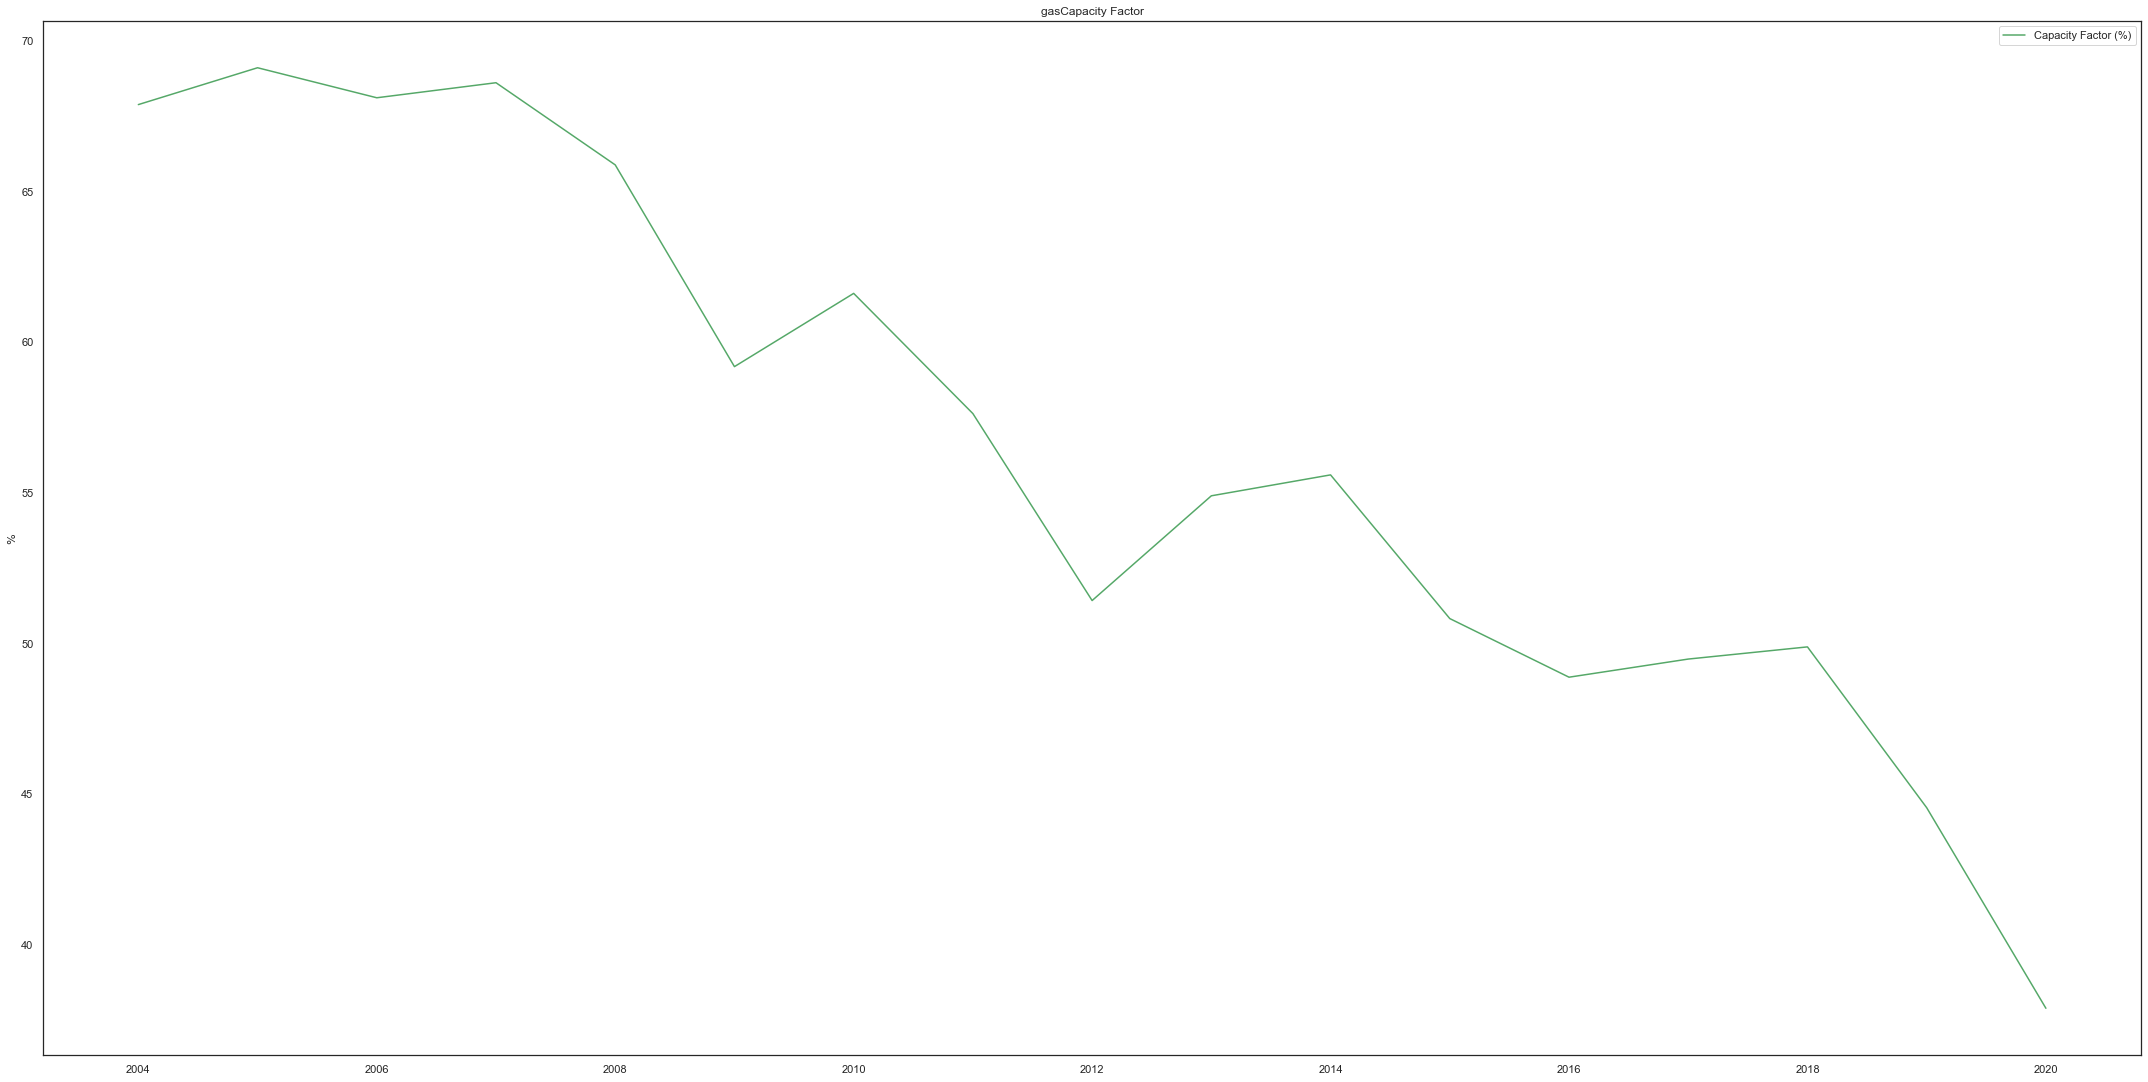

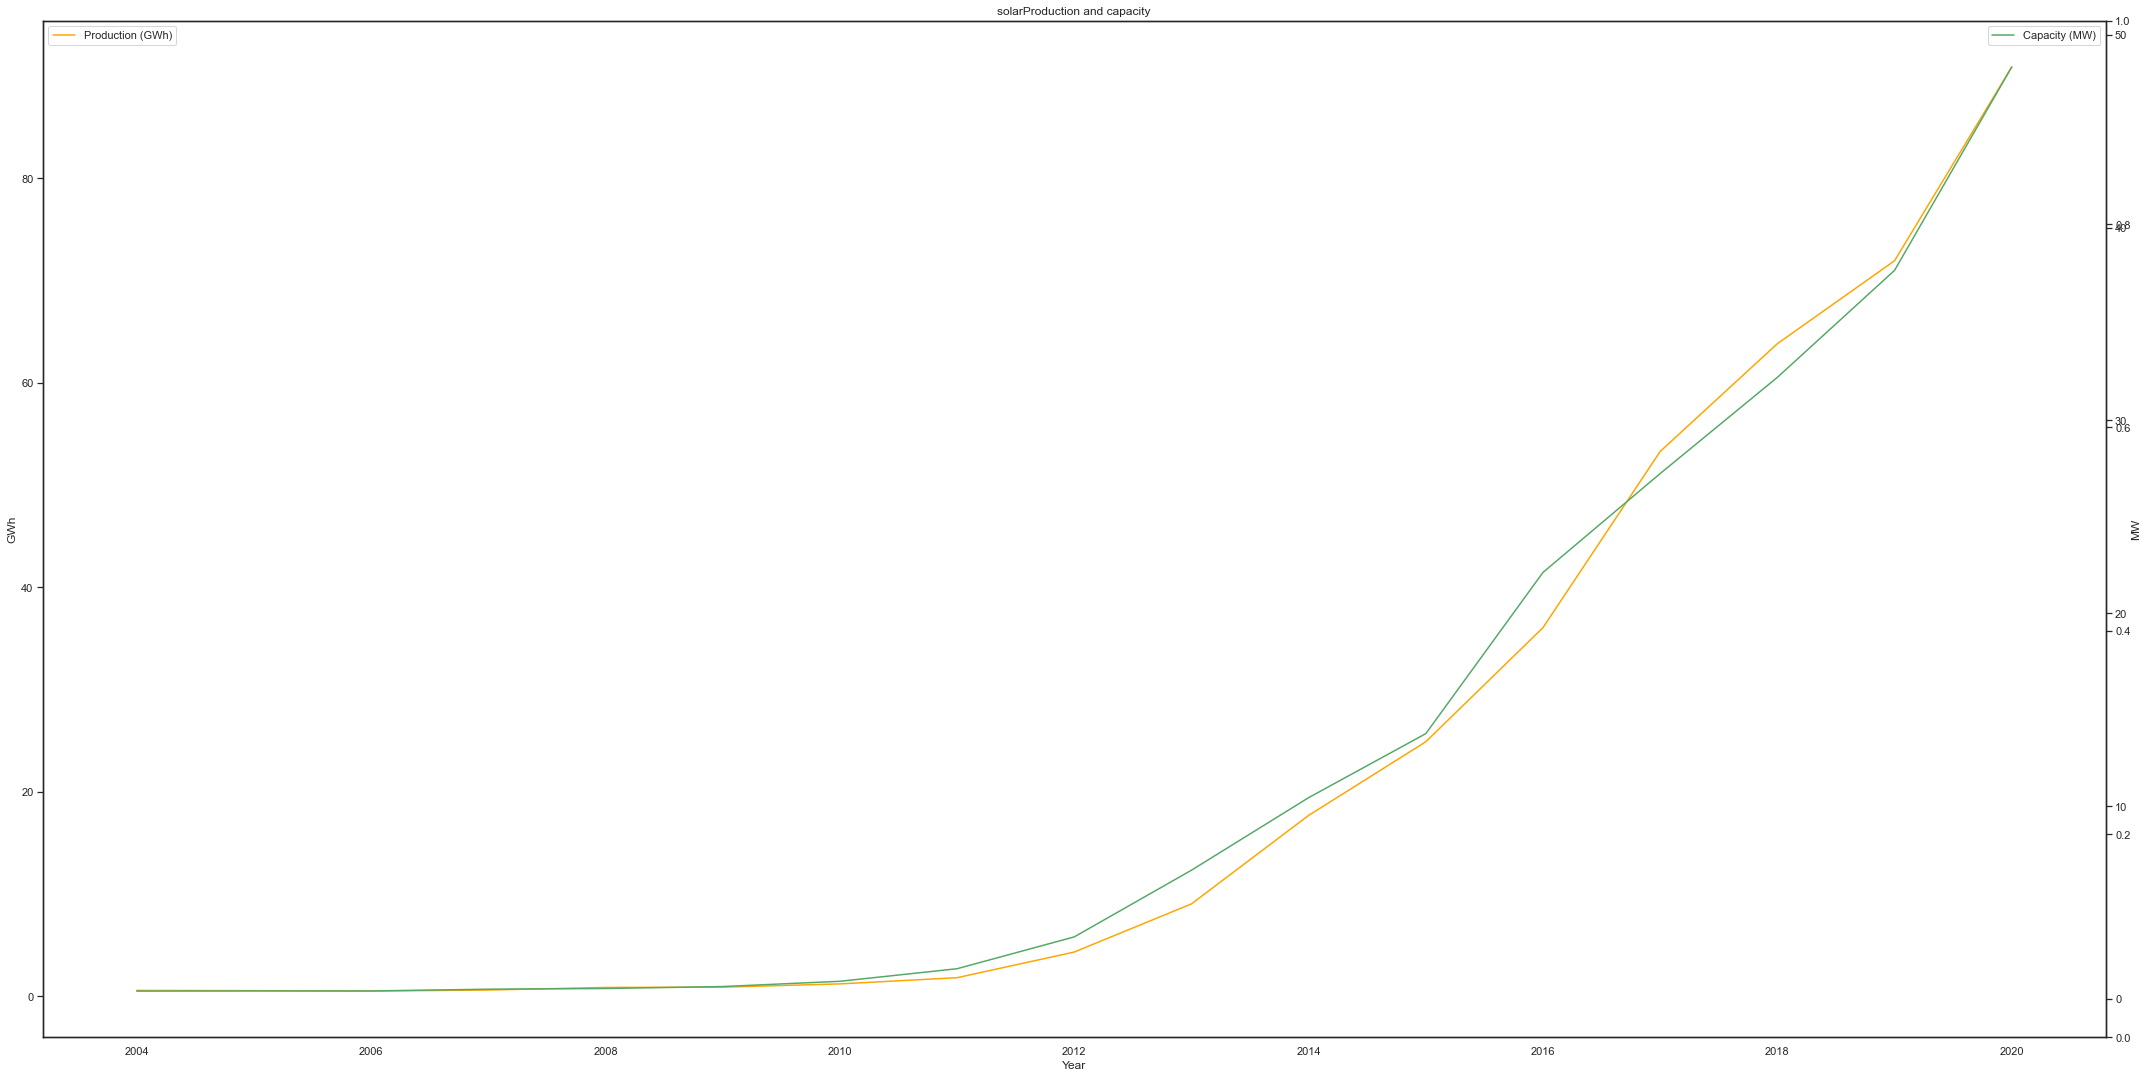

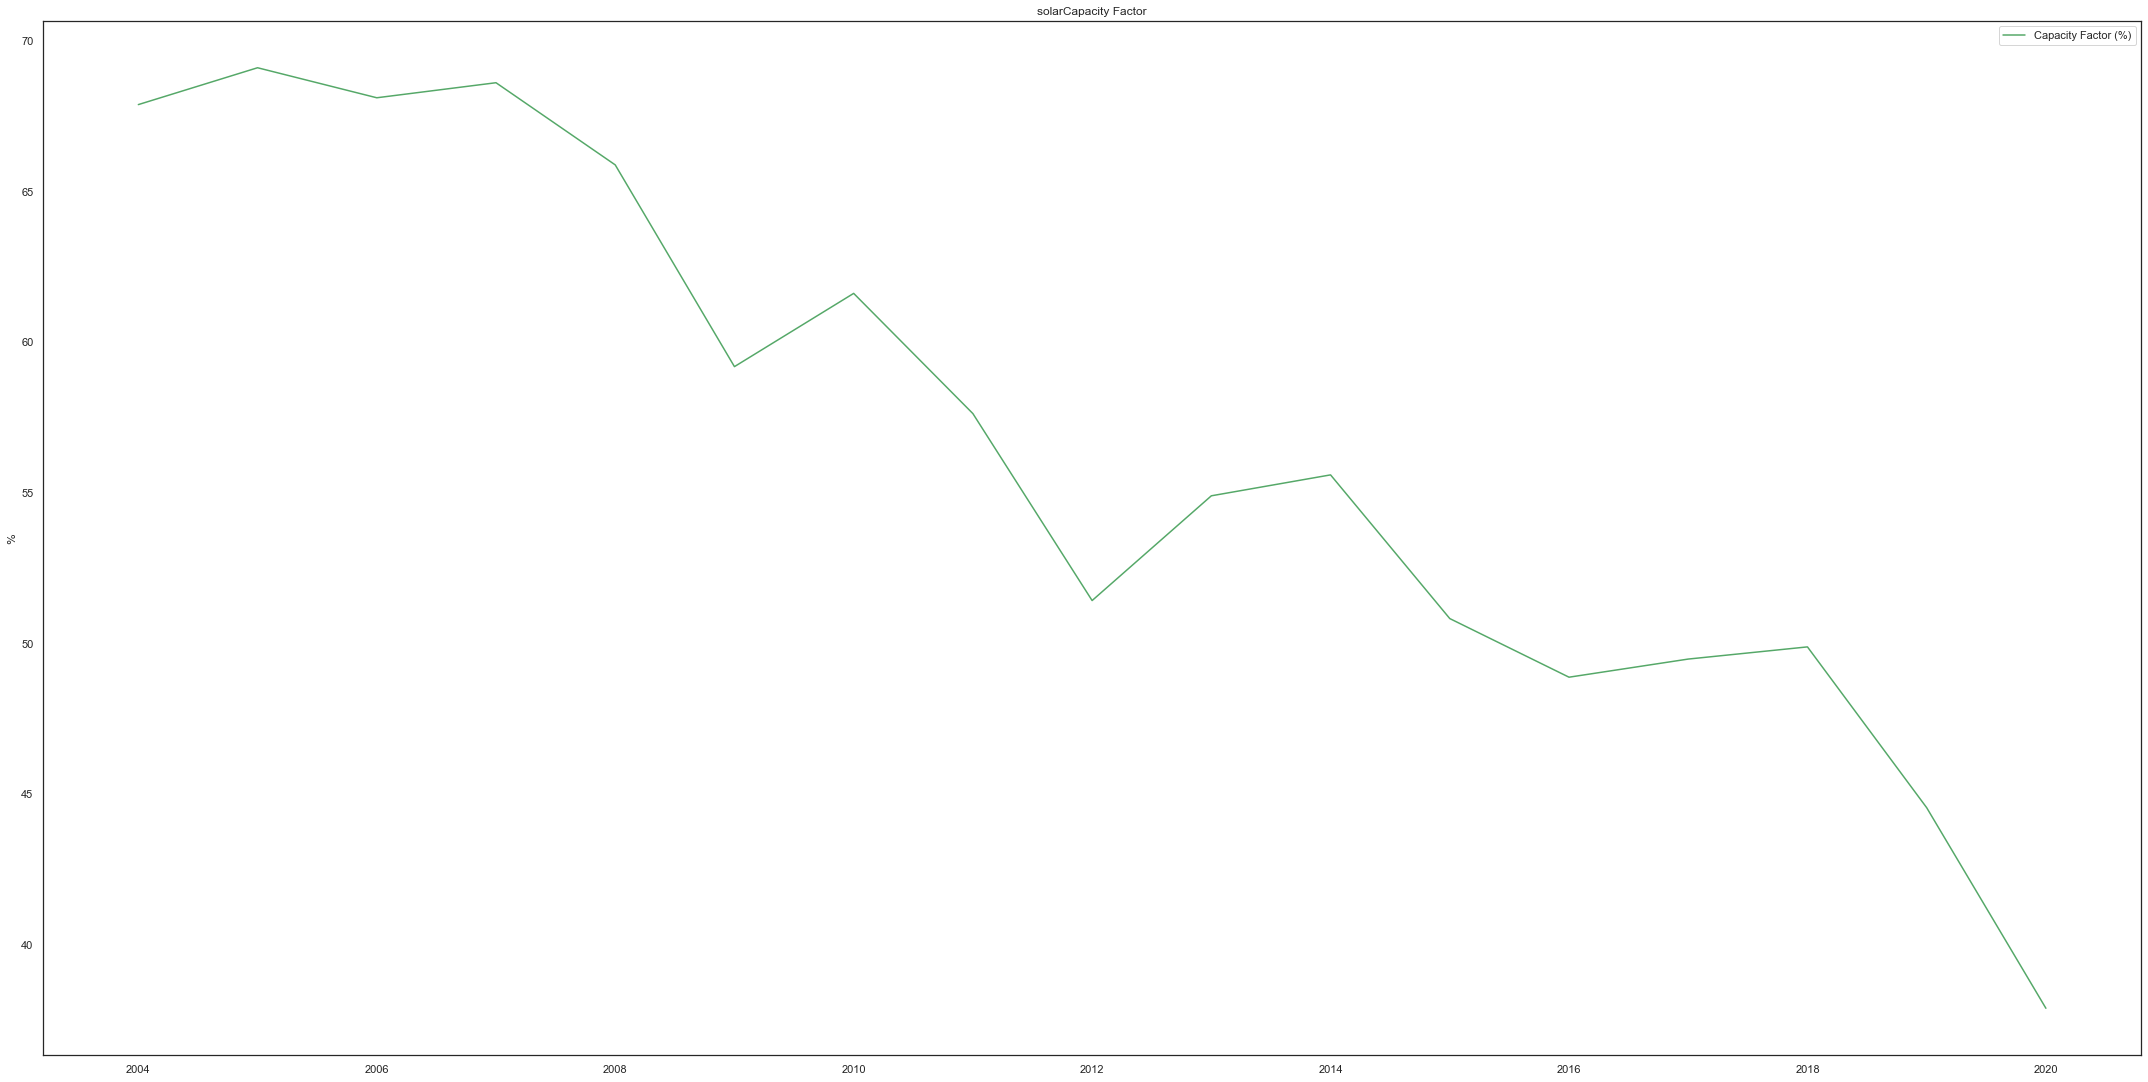

In [124]:
dict_plot = {'coal':df_coal, 'wind':df_wind, 'gas':df_gas, 'solar':df_solar}

for energy in dict_plot:
    plot_synthesis(dict_plot[energy],energy)

# Adding another Axis

In [23]:
def capacity_factor(x):
    prod = x.Production_GWh
    cap = x.Capacity_MW
    return(100* prod/ (cap*365*24/1000))

In [157]:
for df_energy in [df_coal,df_wind,df_gas,df_solar]:
    df_energy['Capacity_MW'] = df_energy.Capacity/1000
    df_energy['Production_GWh'] = df_energy.Value
    df_energy['Capacity_Factor_%'] = df_energy.apply(lambda x: capacity_factor(x),axis=1)

In [149]:
def plot_synthesis_sns(df,energy):
    
    df_interest = df.where(df['Year']>2003).dropna().drop(['Unit','Month','Technology'],axis=1)
    df_tool = df_interest[['Year','Production_GWh','Capacity_MW','Capacity_Factor_%']].set_index('Year')
    
    fig,ax1 = plt.subplots()
    sns.set(rc={'figure.figsize':(12,6)})
        
    plot = sns.lineplot(data = df_interest['Capacity_MW'], label = 'Capacity (MW)', ax=ax1)
    
    ax2= ax1.twinx()
    plot2 = sns.lineplot(data = df_interest['Production_GWh'],label = 'Production (GWh)', color = 'g',ax=ax2)

    plot.set_xlabel('Year', size = 16)
    plot.set_title(energy+' capacity and production in the USA', size = 20)
    plot.legend()
    sns.set_style("white")

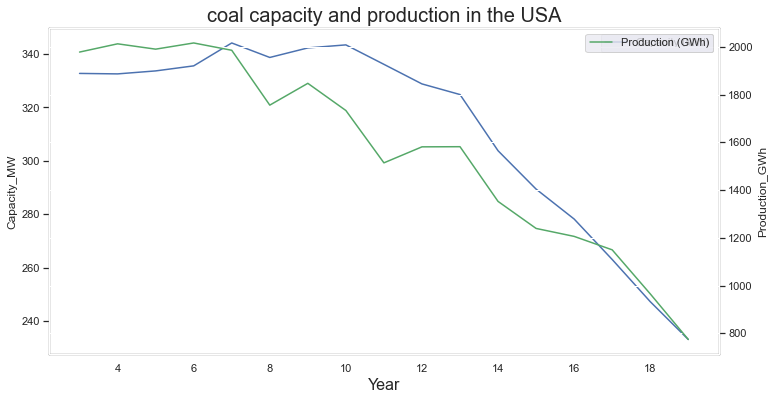

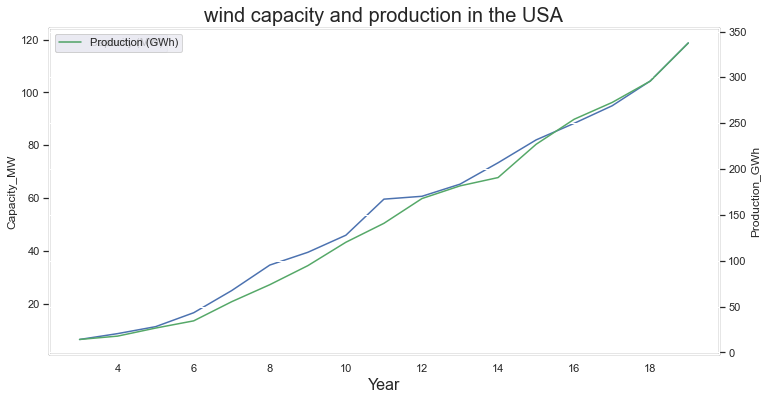

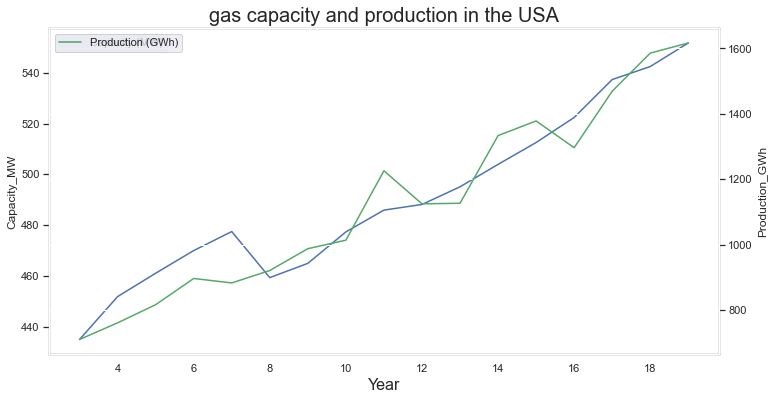

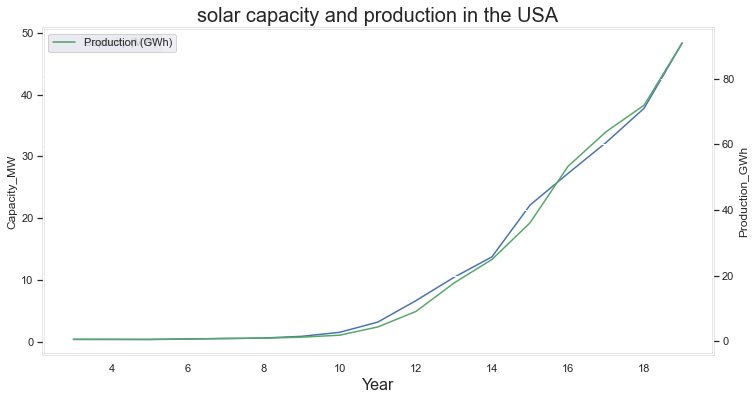

In [150]:
for energy in dict_plot:
    plot_synthesis_sns(dict_plot[energy],energy)

In [153]:
def plot_synthesis_capfac_sns(df,energy):
    
    df_interest = df.where(df['Year']>2003).dropna().drop(['Unit','Month','Technology'],axis=1)
    df_tool = df_interest[['Year','Production_GWh','Capacity_MW','Capacity_Factor_%']].set_index('Year')
    
    sns.set(rc={'figure.figsize':(12,6)})
        
    plot = sns.lineplot(data = df_interest['Capacity_Factor_%'])
    plot.set_xlabel('Year', size = 20)
    plot.set_title(energy+' Capacity Factor', size = 20)
    sns.set_style("white")

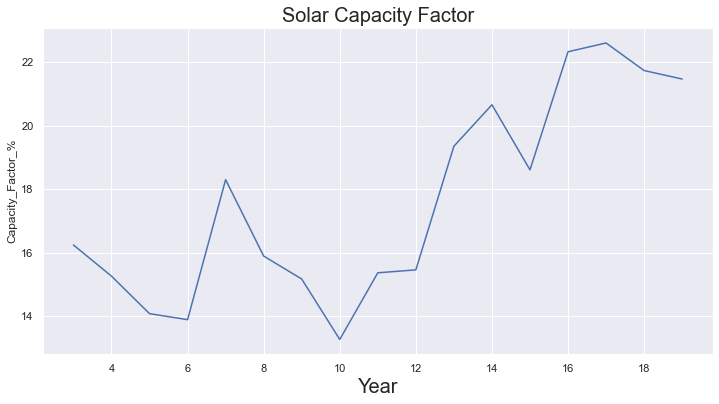

In [160]:
plot_synthesis_capfac_sns(df_solar,'Solar')

# Panel

In [99]:
panel = pd.read_stata('treated_data/Panel/panel.dta')

In [100]:
panel

,index,Unnamed__0,Year,Month,Plant_ID,State,Technology,Capacity_MW_,Wind_Production__GWh_,Solar_Production__GWh_,Coal_Cost,Gas_Cost,CO2_Cost
0,0,0,2010,2.0,3,AL,Conventional Steam Coal,"153,1","94,652246","1,212182",45.58,5.3606,0.0
1,1,1,2010,7.0,3,AL,Conventional Steam Coal,"153,1","94,652246","1,212182",45.13,4.9464,0.0
2,2,2,2010,7.0,3,AL,Conventional Steam Coal,272,"94,652246","1,212182",45.13,4.9464,0.0
3,3,3,2010,12.0,3,AL,Conventional Steam Coal,"403,7","94,652246","1,212182",44.95,5.5464,0.0
4,4,4,2010,10.0,3,AL,Conventional Steam Coal,"788,8","94,652246","1,212182",43.89,4.4541,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156572,156572,156572,2009,7.0,57323,CA,Solar Photovoltaic,"7,5","73,886132","0,891179",43.44,4.1952,0.0
156573,156573,156573,2009,9.0,57326,TX,Onshore Wind Turbine,"49,5","73,886132","0,891179",42.49,4.9312,0.0
156574,156574,156574,2009,12.0,57346,OK,Onshore Wind Turbine,"98,9","73,886132","0,891179",43.39,6.8294,0.0
156575,156575,156575,2009,12.0,57348,NV,Natural Gas Steam Turbine,"4,3","73,886132","0,891179",43.39,6.8294,0.0


In [96]:
panel = pd.read_excel('treated_data/Panel/panel.xlsx').drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
panel['Capacity(MW)'] = panel['Capacity(MW)'].apply(lambda x: lc.atof(x))
panel['Wind Production (GWh)'] = panel['Wind Production (GWh)'].apply(lambda x: lc.atof(x))
panel['Solar Production (GWh)'] = panel['Solar Production (GWh)'].apply(lambda x: lc.atof(x))

In [97]:
coal_panel = panel.where(panel['Technology']=='Conventional Steam Coal').dropna()
gas_panel = panel.where(panel['Technology']=='Natural Gas Steam Turbine').dropna()

Text(0.5, 1.0, 'Coal Capacity USA')

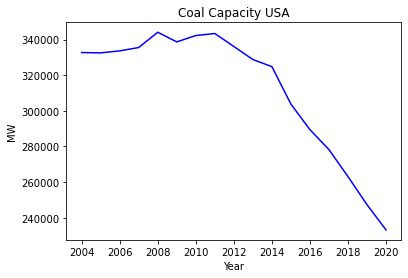

In [83]:
coal = df_coal.where(df_coal['Year']>2003).dropna()
fig, ax1 = plt.subplots()
year = coal['Year']
capacity = coal['Capacity']
ax1.set_xlabel('Year')
ax1.set_ylabel('MW')
ax1.plot(year, capacity , color='b', label = 'Capacity Coal USA')
plt.title('Coal Capacity USA')

In [84]:
df_capacity = gen_sum_df(coal_panel,'Capacity(MW)')
df_plants = gen_count_df(coal_panel,'Plant_ID')
df_gas_cost = gen_max_df(coal_panel,'Gas_Cost')
df_coal_cost = gen_max_df(coal_panel,'Coal_Cost')
df_co2_cost = gen_max_df(coal_panel,'CO2_Cost')
df_capacity_gas = gen_sum_df(gas_panel,'Capacity(MW)')
df_capacity_gas['Capacity Gas'] = df_capacity_gas['Capacity(MW)']
df_capacity_gas = df_capacity_gas.drop('Capacity(MW)',axis=1)

In [85]:
df_plot = iterative_merge([df_capacity,df_plants,df_gas_cost,df_co2_cost,df_coal_cost,df_capacity_gas])
df_plot_plants = pd.merge(df_capacity,df_plants, on = 'Year')

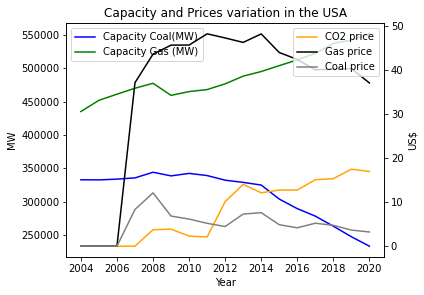

In [86]:
fig, ax1 = plt.subplots()

year = df_plot['Year']
capacity = df_plot['Capacity(MW)']
capacity_gas = df_plot['Capacity Gas']
co2 = df_plot['CO2_Cost']
coal = df_plot['Coal_Cost']
gas = df_plot['Gas_Cost']

ax1.set_xlabel('Year')
ax1.set_ylabel('MW')
ax1.plot(year,capacity , color='blue', label = 'Capacity Coal(MW)')
ax1.plot(year,capacity_gas , color='green', label = 'Capacity Gas (MW)')

ax1.legend(loc='upper left')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('US$')  # we already handled the x-label with ax1
ax2.plot(year, co2, color='orange', label = 'CO2 price')
ax2.plot(year, coal, color='black', label = 'Gas price')
ax2.plot(year, gas, color='gray', label = 'Coal price')

ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Capacity and Prices variation in the USA')
plt.show()

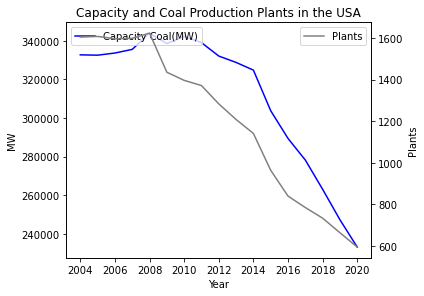

In [87]:
fig, ax1 = plt.subplots()

year = df_plot['Year']
capacity = df_plot['Capacity(MW)']
plants = df_plot_plants['Plant_ID']

ax1.set_xlabel('Year')
ax1.set_ylabel('MW')
ax1.plot(year,capacity , color='blue', label = 'Capacity Coal(MW)')
ax1.legend(loc='upper left')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Plants')  # we already handled the x-label with ax1
ax2.plot(year, plants, color='gray', label = 'Plants')

ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Capacity and Coal Production Plants in the USA')
plt.show()